In [9]:
%load_ext autoreload
%autoreload 2
import pickle
import sys
import matplotlib.pyplot as plt
import numpy as np
import _utils_stacked_lensing_profiles as prf
sys.path.append('../')
import _redshift_richness_bins as analysis

def load(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)
def save_pickle(dat, filename, **kwargs):
    file = open(filename,'wb')
    pickle.dump(dat, file)
    file.close()
suff_cat = ''
ind_profile = np.load('../data/ind_profile_redmapper'+suff_cat+'.pkl', allow_pickle = True)
ind_profile['cluster_id'] = ind_profile['id']
suff_coverage = '_partial_coverage'
if suff_coverage == '_partial_coverage':
    cluster_id_avoid = np.load(f'../lensing_profile_measurement/cluster_id_with_partial_coverage'+suff_cat+'.npy', allow_pickle = True)
    mask_id_avoid = np.invert(np.isin(ind_profile['id'], cluster_id_avoid))
    ind_profile = ind_profile[mask_id_avoid]
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
profile_true_stack = prf.stacked_profile(profile = ind_profile,
                    r_in = 'radius_true',
                    gt_in = 'DSt_true', gx_in = 'DSx_true',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'W_l_true',
                    z_name = 'redshift', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin, add_columns_to_bin = ['W_l_true','richness', 'redshift',])


In [11]:
#[print(len(profile_true_stack['W_l_true'][index])) for index in range(20)]

In [12]:
covariance_boot = prf.bootstrap_covariance(profile = ind_profile,
                    r_in = 'radius_true',
                    gt_in = 'DSt_true', gx_in = 'DSx_true',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'W_l_true',
                    n_boot = 300,
                    z_name = 'redshift', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

In [13]:
covariance_jackk = prf.jacknife_covariance(profile = ind_profile,
                    r_in = 'radius_true',
                    gt_in = 'DSt_true', gx_in = 'DSx_true',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'W_l_true',
                    n_side = 32,
                    ra = 'ra', dec = 'dec',
                    z_name = 'redshift', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

In [14]:
covariance_sample = prf.sample_covariance(profile = ind_profile,
                    r_in = 'radius_true',
                    gt_in = 'DSt_true', gx_in = 'DSx_true',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'W_l_true',
                    z_name = 'redshift', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

154


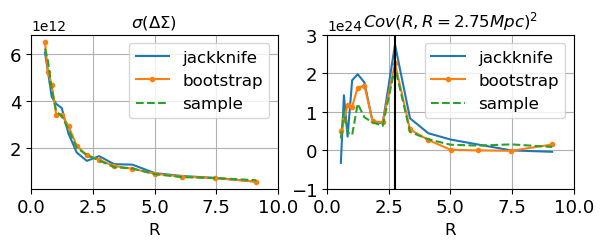

In [17]:
plt.figure(figsize=(7,2))
plt.subplot(121)
index = 1
print(len(profile_true_stack['W_l_true'][index]))
plt.plot(profile_true_stack['radius'][0], (covariance_jackk['cov_t'][index].diagonal()**.5), '-', label = 'jackknife')
plt.plot(profile_true_stack['radius'][0], (covariance_boot['cov_t'][index].diagonal()**.5), '.-', label = 'bootstrap')
plt.plot(profile_true_stack['radius'][0], (covariance_sample ['cov_t'][index].diagonal()**.5), '--', label = 'sample')
plt.legend()
plt.title(r'$\sigma(\Delta\Sigma)$', fontsize=12)
plt.xlabel('R', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(0., 10)
plt.tick_params(axis='both', which="both", labelsize= 13)
plt.subplot(122)
indexr = 8
plt.plot(profile_true_stack['radius'][0], covariance_jackk['cov_t'][index][:,indexr], '-', label = 'jackknife')
plt.plot(profile_true_stack['radius'][0], covariance_boot['cov_t'][index][:,indexr], '.-', label = 'bootstrap')
plt.plot(profile_true_stack['radius'][0], covariance_sample ['cov_t'][index][:,indexr], '--', label = 'sample')
plt.legend()
#plt.xscale('log')
rs = profile_true_stack['radius'][0][indexr]
plt.vlines(rs, -1e24, 3e24, color='k')
plt.ylim( -1e24, 3e24)
plt.title(f'$Cov(R, R={rs:.2f} Mpc)^2$', fontsize=12)
plt.xlabel('R', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(0., 10)
plt.tick_params(axis='both', which="both", labelsize= 13)
plt.savefig(f'../fig/redmapper_clusters_lensing_profile_covariance.png', bbox_inches='tight', dpi=100)

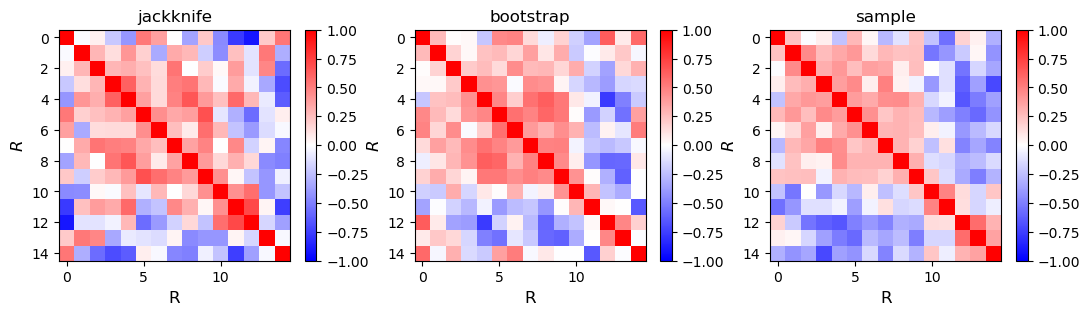

In [18]:
plt.figure(figsize=(13,3))
plt.subplot(131)
plt.imshow(np.corrcoef(covariance_jackk['cov_t'][index]), vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()
plt.ylabel(r'$R$', fontsize=12)
plt.xlabel('R', fontsize=12)
plt.title('jackknife')
plt.subplot(132)
plt.title('bootstrap')
plt.imshow(np.corrcoef(covariance_boot['cov_t'][index]), vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()
plt.ylabel(r'$R$', fontsize=12)
plt.xlabel('R', fontsize=12)
plt.subplot(133)
plt.title('sample')
plt.imshow(np.corrcoef(covariance_sample['cov_t'][index]), vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()
plt.ylabel(r'$R$', fontsize=12)
plt.xlabel('R', fontsize=12)
plt.savefig(f'../fig/redmapper_clusters_lensing_profile_covariance_2.png', bbox_inches='tight', dpi=100)